In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"
adata = sc.read(folder_path + "preprocessed_adata.h5ad")

# batch 확인

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# running time: 2m 19s

In [4]:
adata.obs['sample'].unique()

['Pt1', 'Pt2', 'Pt3', 'Pt4', 'Pt5', ..., 'Pt20', 'Pt21', 'Pt22', 'Pt23', 'Pt24']
Length: 24
Categories (24, object): ['Pt1', 'Pt2', 'Pt3', 'Pt4', ..., 'Pt21', 'Pt22', 'Pt23', 'Pt24']

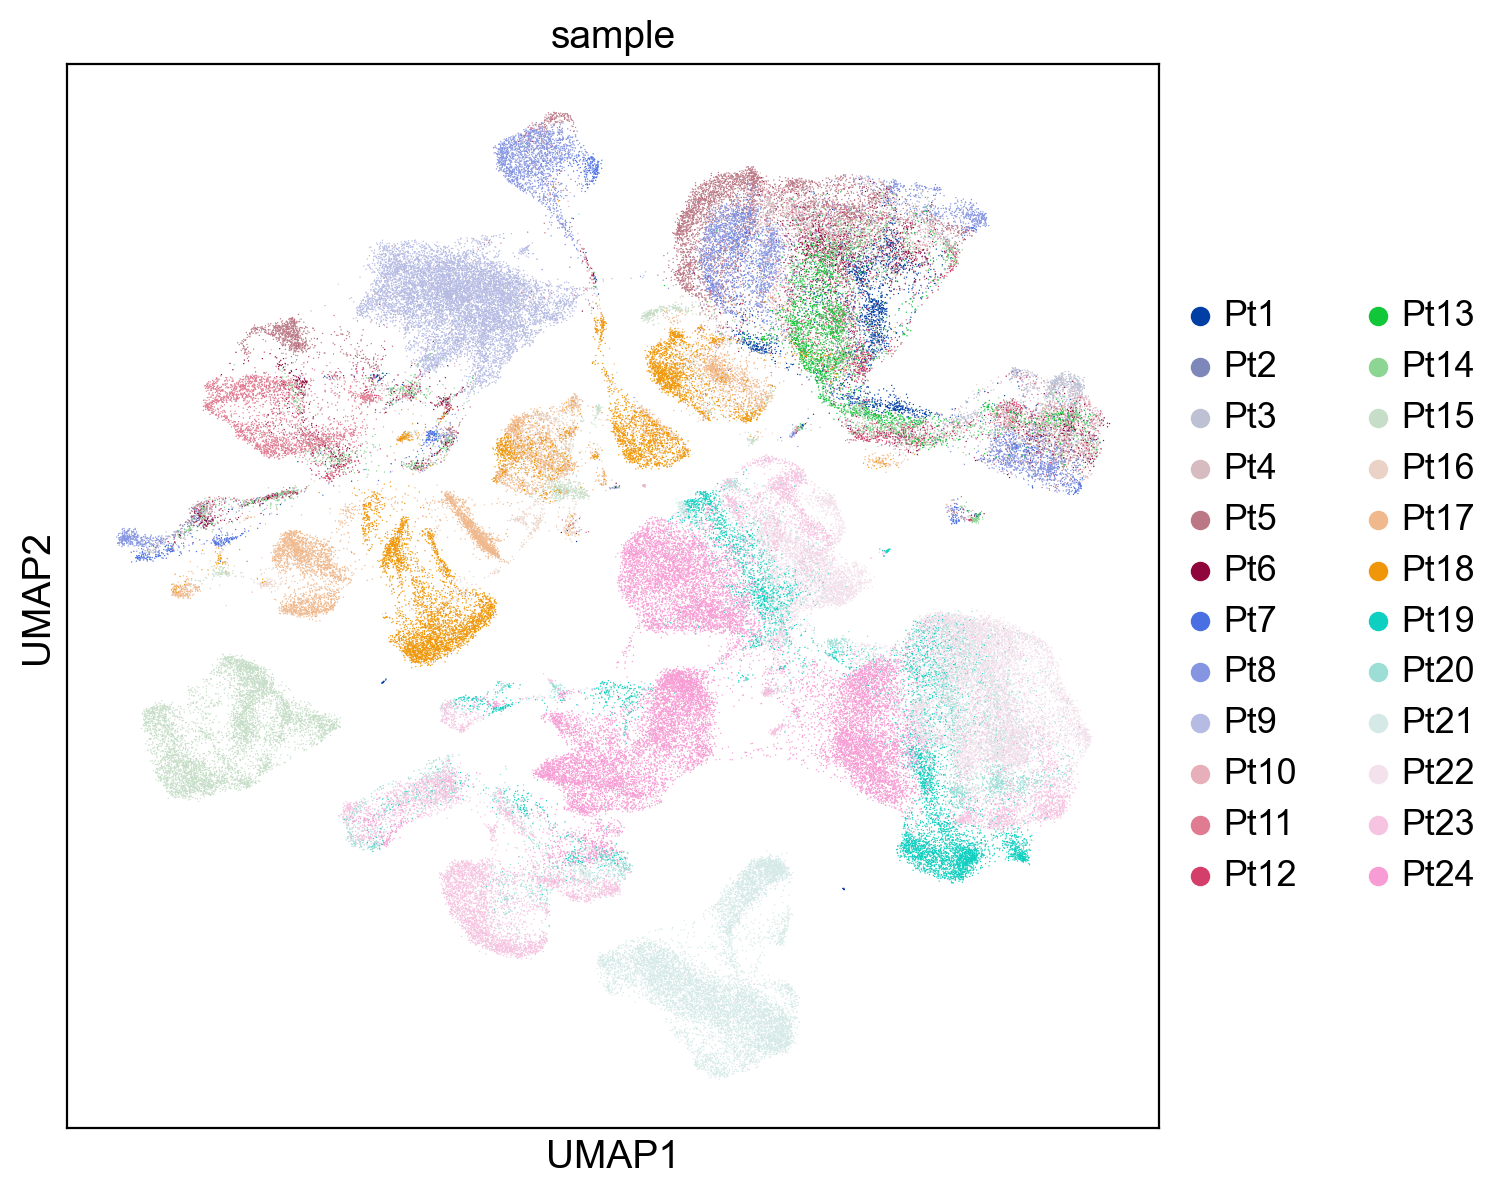

In [5]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample'
)

# batch correctino by harmony

In [6]:
import harmonypy as hm

sc.tl.pca(adata, svd_solver='arpack')

adata.obsm['X_pca_harmony'] = hm.run_harmony(adata.obsm['X_pca'], adata.obs, 'sample').Z_corr.T

# run time: 11m 45s
# run time: 6m 25s

2024-07-09 14:25:30,926 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
c:\Users\heung\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\heung\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
2024-07-09 14:25:47,993 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-09 14:25:48,390 - harmonypy - INFO - Iteration 1 of 10
2024-07-09 14:26:24,197 - harmonypy - INFO - Iteration 2 of 10
2024-07-09 14:26:59,659 - harmonypy - INFO - Iteration 3 of 10
2024-07-09 14:27:34,987 - harmonypy - INFO - Iteration 4 of 10
2024-

In [7]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony')
sc.tl.umap(adata)

# running time: 1' 29"

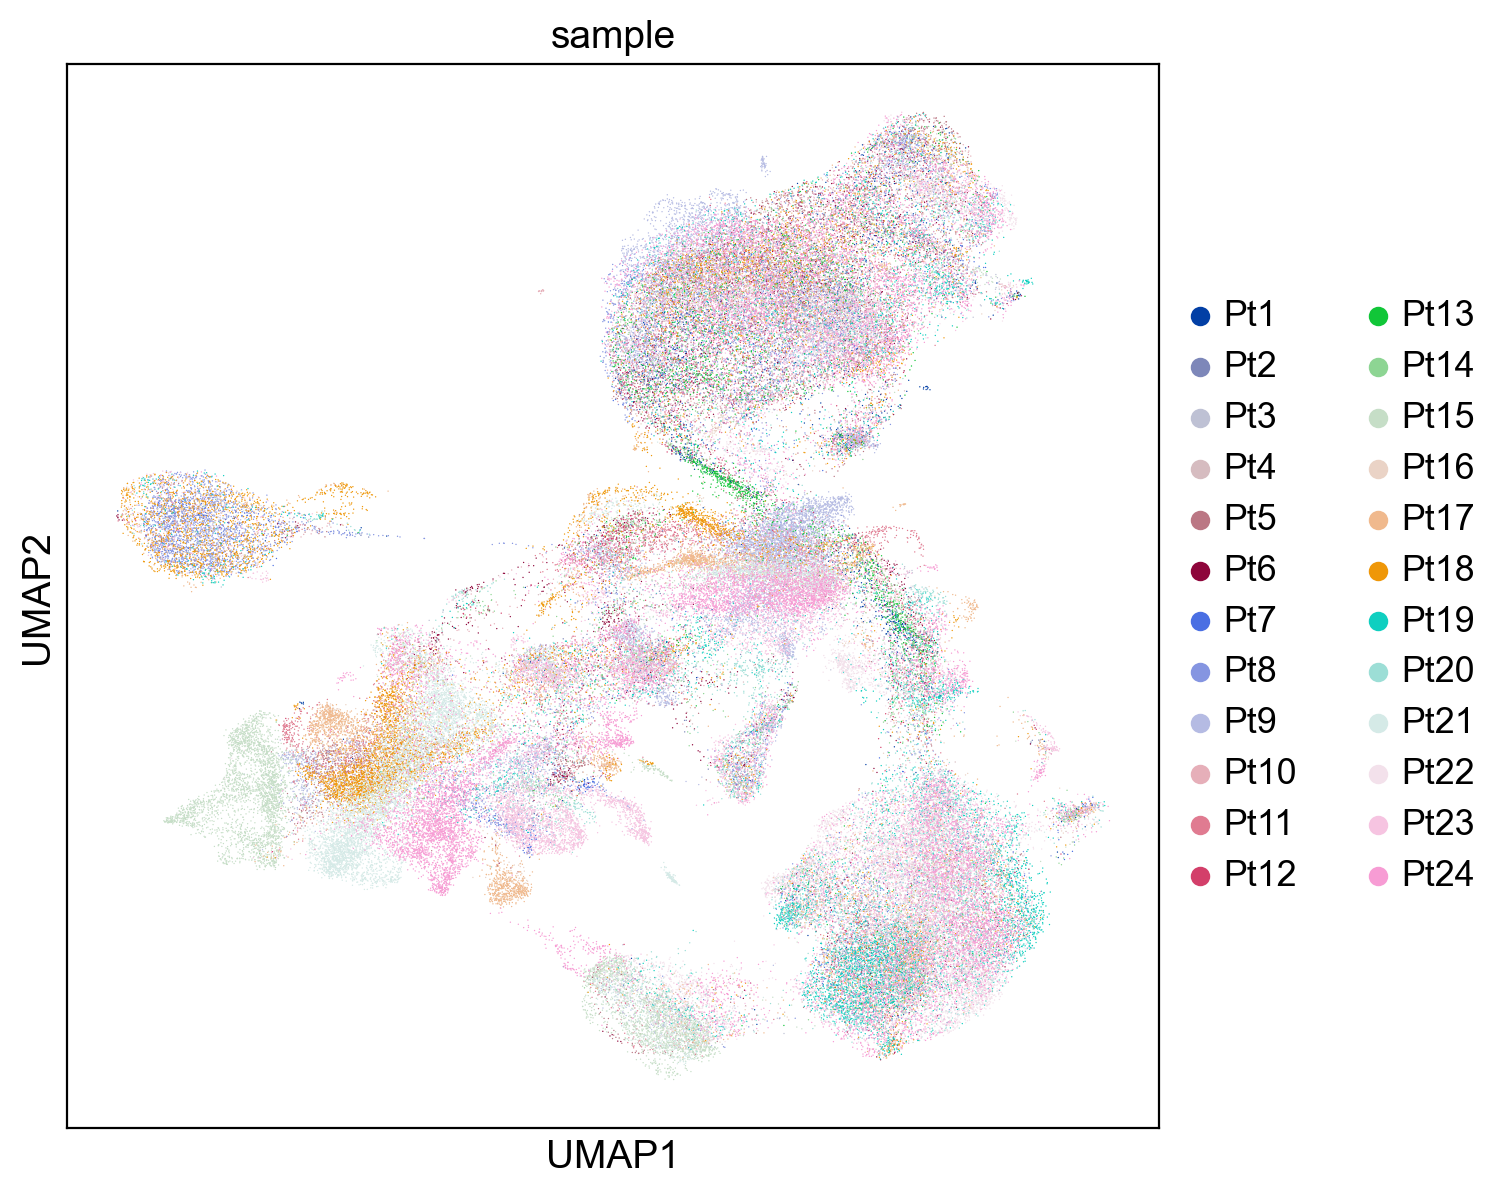

In [8]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample',
)

> 된건지 잘 모르겠음.\
> 아예 차이가 없는 듯\
> 원본 논문에서도 normal에서는 microglia가 대부분이었는데 tumor 에서 macrophage, T cell 등 다양한 세포가 생긴다고 나와서 그렇게 틀린거 같진 않기도 하고?

# Save

In [9]:
adata.write_h5ad(folder_path + "adata_harmony.h5ad")